## SIRD Model

For the modelling of COVID-19's progression, simply using the SIR model is not enough to show the human cost of the disease. We recommend using the SIRD model or enhanced versions of it. There was a number of assumptions made in the making of this model.
1. The reproduction rate is constant from the beginning of the simulation. This is demonstrably false because as number of cases rise, the government and its citizens would take actions against the disease.
2. We use a classic SIRD model, which disregard the effect of age and pre-existing conditions on patients. This drawback can be mitigated by applying the model on each group individually.
3. This model use the differential equation model, which is entirely deterministic. This limits the complexity of the model, but increase the ease of analyzing.

The consequence of these assumptions is that

### Parameters:
- Total population: 25,693,059 (Population of Australia)
- Initial number of infected individuals: 5 (Chosen number, subject to sensitivity analysis)
- Effective contact rate: 0.4 (Calculated from mean recovery rate and natural reproduction rate)
- Recovery rate: 1/10
- Mortality rate: 0.0303 (Total deaths/Total cases in Australia)

577605.44635844 10097755.651084969 24376835.439808242 738618.113826188


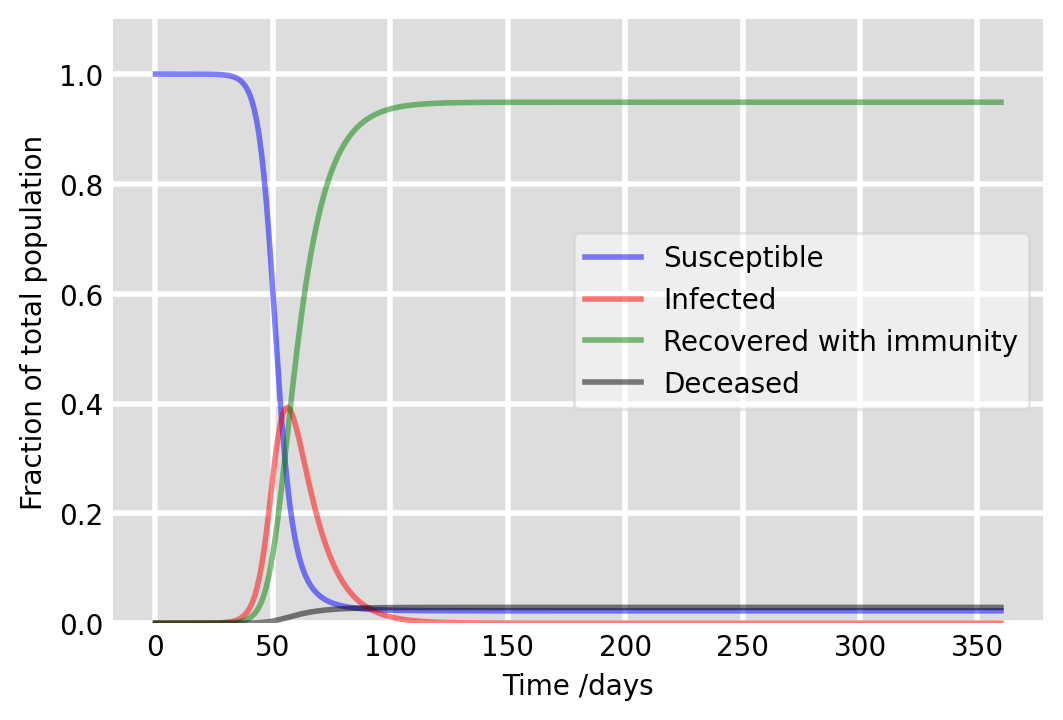

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 25693059
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 5, 0
# Initial number of deceased individuals, D0.
D0 = 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0 - D0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 1/10
# Mortality rate (per day of infection which), mu.
mu = 0.0303 * gamma
# A grid of time points (in days)
t = np.linspace(0, 360, 360)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma, mu):
    S, I, R, D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, mu))
S, I, R, D = ret.T
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(dpi=200, facecolor="w")
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/N, 'k', alpha=0.5, lw=2, label='Deceased')
ax.legend()
ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of total population')
ax.set_ylim(0,1.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Of course, the above scenario would never happen in the real-world, just as it didn't during March 2020. This is a highly unrealistic model that pays no attention to how people would react. This can only be used to serve as a demonstration of what would have happened to Australia in 2020, had the government not manage the situation the way it did. During the first 100 days period, the pandemic would have killed more than 700,000 people, leaving more than 90% of the population with residual effects of the disease, and at one point had 40% of the population infected, overwhelming the healthcare system by a few orders of magnitude. This goes to show the importance of containing Covid-19.